# Введение

В этом проекте мы проведем исследование для крупного интернет-магазина. Вместе с отделом маркетинга мы приготовили список гипотез для увеличпения выручки.

В ходе работы, мы приоретизируем гипотезы, запустим А/В тест, а также считаем и проанализируем его результаты.

## Приоретизация гипотез

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns
from pymystem3 import Mystem
from collections import Counter
from scipy import stats as st
import datetime as dt

In [2]:
pd.options.display.max_colwidth = 120

In [3]:
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# приоретизируем по параметру ICE с последующей сортировкой

data['ICE'] = data['Impact'] * data['Confidence'] / data['Efforts']
data[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [5]:
# приоретизируем по параметру RICE с последующей сортировкой

data['RICE'] = data['Reach'] * data['Impact'] * data['Confidence'] / data['Efforts']
data[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)


,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


По результатам приоретизации видим, что она отличается по параметрам ICE и RICE. В первом случае четверка лидеров - гипотезы 8, 0, 7, 6 а во втором - 7, 2, 0, 6. Три из четырех гипотез неизменно в лидерах по обоим параметрам. Однако в парметре RICE гипотеза 2 вытеснила гипотезу 8, так как параметр Reach у гипотезы 2 равен 8, в то время, как у гипотезы 8 этот параметр равен 1, отсюда и разница. При приоритезации необходимо учитывать число пользователей, которых затронет изменение, поэтому приоритетнее взять на тест ту гипотезу, которая охватывает бОльшее количество пользователей.

Итак, для теста лучше всего взять следующие гипотезы:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


## Анализ А/В теста

Мы провели А/В тест и получили его результаты. Теперь нам предстоит проанализровать их.

In [6]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv('/datasets/visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Проведем предобработку данных: изучим типы данных, посмотрим, есть ли в данных повторения или пропуски и решим, что с ними делать.

In [8]:
print(visitors.info())
print()
print(orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
None


In [9]:
print(visitors.isnull().sum())
print()
print(orders.isnull().sum())

date        0
group       0
visitors    0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


In [10]:
print(visitors.duplicated().sum())
print(orders.duplicated().sum())

0
0


По результатам изучения датасетов видим отличную картину: дубликатов и пропусков нет, типы данных соответствуют необходимым для проведения анализа. 

### Подготовим данные и построим график кумулятивной выручки по группам

Изучим данные, предоставленные для анализа: выясним сколько у нас групп в тесте, даты начала и даты окончания теста, количество пользователей в каждой из групп, а также выясним, не "задваиваются" ли у нас пользователи в обеих группах.

In [11]:
print(visitors['group'].unique())
print(orders['group'].unique())

['A' 'B']
['B' 'A']


В тесте принимали участие 2 группы.

In [12]:
print(orders['date'].min())
print(orders['date'].max())

2019-08-01 00:00:00
2019-08-31 00:00:00


Тест проводился в течение месяца - с 1 по 31 августа 2019 года.

In [13]:
print(orders.query('group == "A"').count())
print()
print(orders.query('group == "B"').count())

transactionId    557
visitorId        557
date             557
revenue          557
group            557
dtype: int64

transactionId    640
visitorId        640
date             640
revenue          640
group            640
dtype: int64


В группу А вошло 557 пользователей, в группу В - 640. Проверим, есть ли пересекающиеся пользователи и если есть, уберем их, чтобы не искажали нам картину.

In [14]:
duplicates_users = np.intersect1d(orders.query('group == "A"')['visitorId'].unique(), orders.query('group == "B"')['visitorId'].unique())
duplicates_users

array([   8300375,  199603092,  232979603,  237748145,  276558944,
        351125977,  393266494,  457167155,  471551937,  477780734,
        818047933,  963407295, 1230306981, 1294878855, 1316129916,
       1333886533, 1404934699, 1602967004, 1614305549, 1648269707,
       1668030113, 1738359350, 1801183820, 1959144690, 2038680547,
       2044997962, 2378935119, 2458001652, 2579882178, 2587333274,
       2600415354, 2654030115, 2686716486, 2712142231, 2716752286,
       2780786433, 2927087541, 2949041841, 2954449915, 3062433592,
       3202540741, 3234906277, 3656415546, 3717692402, 3766097110,
       3803269165, 3891541246, 3941795274, 3951559397, 3957174400,
       3963646447, 3972127743, 3984495233, 4069496402, 4120364173,
       4186807279, 4256040402, 4266935830])

In [15]:
orders = orders[~orders['visitorId'].isin(duplicates_users)]

In [16]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      23      19   142779       719
1 2019-08-01     B      17      17    59758       713
2 2019-08-02     A      42      36   234381      1338
3 2019-08-02     B      40      39   221801      1294
4 2019-08-03     A      66      60   346854      1845


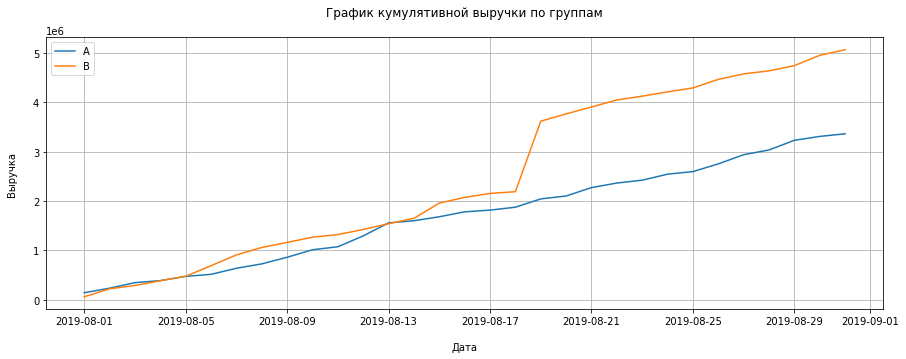

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Выручка\n')
plt.legend()
plt.grid()
plt.show()

В группе А никаких особенностей - ровный  постепенный рост выручки изо дня в день. А в группе В наблюдаем резкий скачок выручки в период 18.08.2019-19.08.2019. Это может быть связано с резким увеличением количества заказов или с необычно высоким средним чеком в этот день. Далее рост был снова плавным и непримечательным. Возьмем это на заметку.

### Построим график кумулятивного среднего чека по группам. 

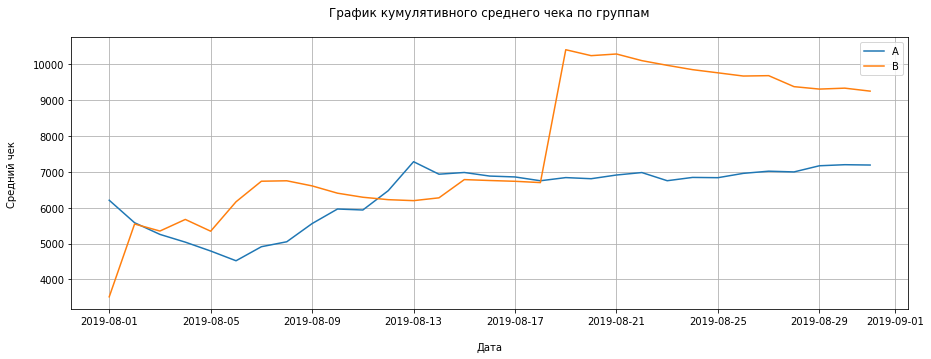

In [18]:
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Средний чек\n')
plt.legend()
plt.grid()
plt.show()

В начале теста в группе А средний чек падал, после чего поднялся до пиковой отметки в 7400 13.08.2019, после чего снова слегка снизился и держался около 7000 до конца теста.

В группе В существенного снижения среднего чека не было, был один "плохой" день 05.08.2019 (в группе А кстати худший показатель пришелся тоже рядом с этой датой). Далее средний чек держался около 6500-7000 до 18.08.2019. 18.08.2019-19.08.2019 произошел скачок среднего чека до 10100, после чего показатель пошел на снижение и к концу теста опустился до 9200.

В целом показатель кумулятивного среднего чека группы В выше, чем группы А. Но такая нестабильность в графиках может указывать на аномалии или выбросы в данных. 

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

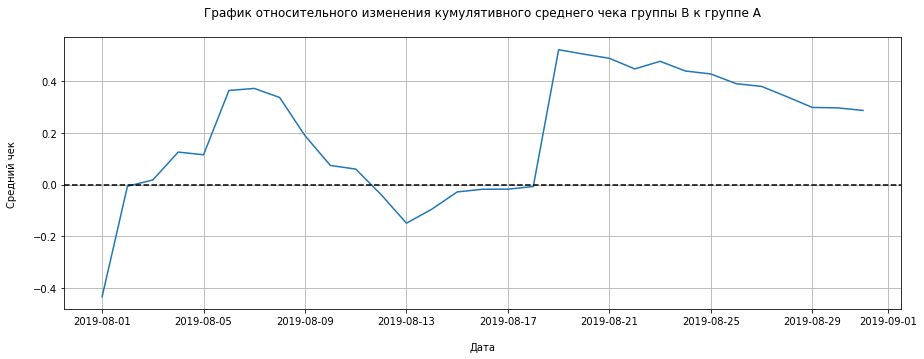

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А\n  ')
plt.xlabel('\nДата')
plt.ylabel('Средний чек\n')
plt.grid()
plt.show()

По этому графику видно, как сильно менялось соотношение в определенные даты. Вероятнее всего, именоо в эти дни были совершены аномальные заказы.

### Построим график кумулятивного среднего количества заказов на посетителя по группам

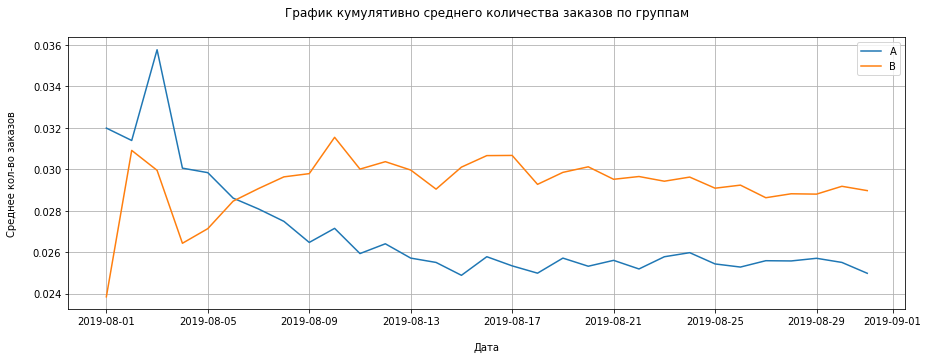

In [38]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивно среднего количества заказов по группам\n  ')
plt.xlabel('\nДата')
plt.ylabel('Среднее кол-во заказов\n')
plt.grid()
plt.legend()
plt.show()

В начале теста группа А имела бОльшее количество заказов, но потом, после 06.08.2019 группа В вышла вперед и далее количество заказов группы В было существенно выше, чем в группе А

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

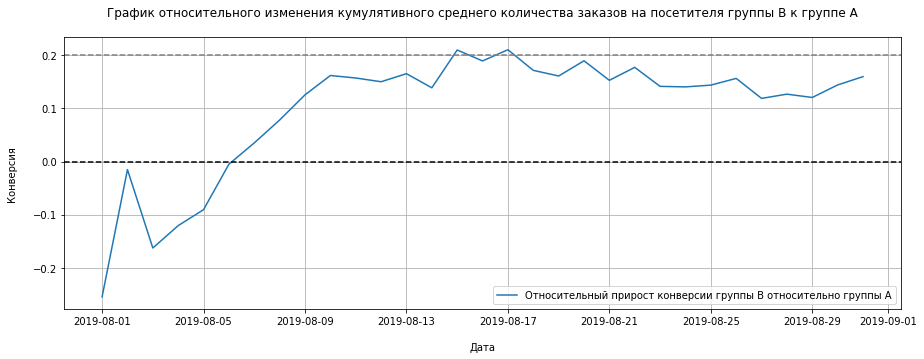

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A\n  ')
plt.xlabel('\nДата')
plt.ylabel('Конверсия\n')
plt.grid()
plt.legend()
plt.show()

Почти на протяжении всего теста конверсия группы В была уверенно выше конверсии группы А

### Построим точечный график количества заказов по пользователям

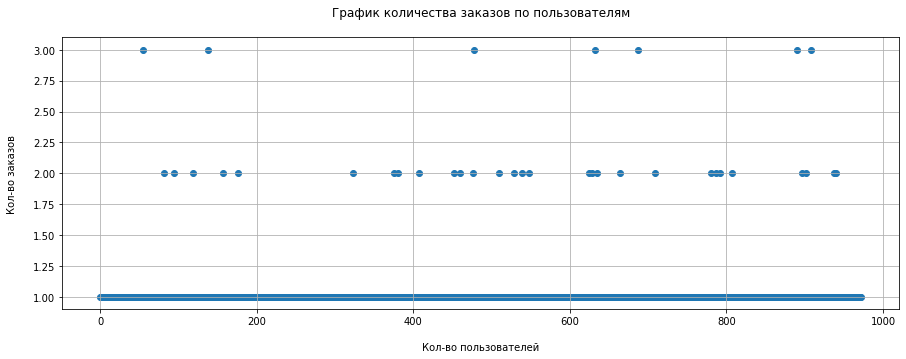

In [22]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям\n  ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Кол-во заказов\n')
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.show()

По графику видим, что больше всего пользователей, которые совершили 2 заказа, меньше тех, кто совершил 3 заказа, тех, кто совершил более 4 заказов можно считать аномальными. Перепроверим через процентили.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [23]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

95% пользователей совершают 2 заказа, не более 1% совершает боольше 4 заказов. Все, что выше 4 заказов будем считать аномальным.

### Построим точечный график стоимостей заказов

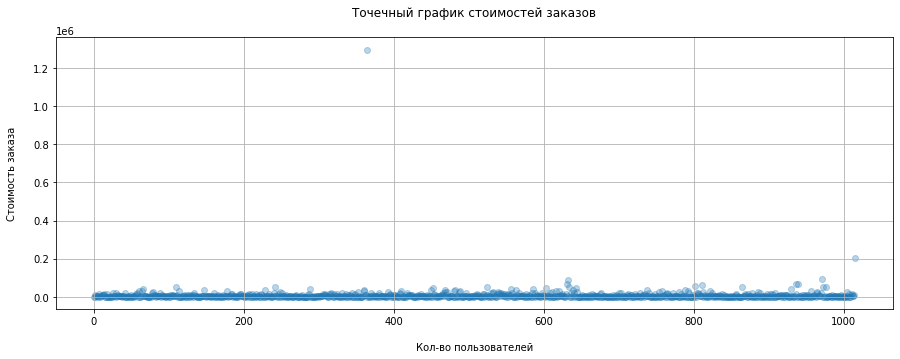

In [24]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график стоимостей заказов\n ')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(x_values, orders['revenue'], alpha=0.3);

Этот график не сказать, что наглядный. Картину портят аномальные значения. Попробуем от них избавиться и построить график заново.

In [25]:
orders['revenue'].sort_values().tail()

743       67990
744       86620
1136      92550
1196     202740
425     1294500
Name: revenue, dtype: int64

Видим 2 аномально дорогих заказа на 1294500 и на 202740. Исключим их с помощью среза и построим новый точечный график.

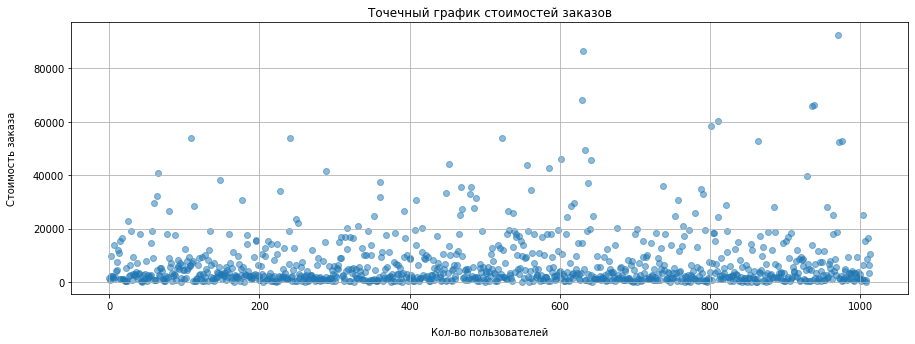

In [26]:
orders_normal = orders[orders['revenue']<=200000]['revenue']
xn_values = pd.Series(range(0,len(orders_normal)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('\nКол-во пользователей')
plt.ylabel('Стоимость заказа\n')
plt.scatter(xn_values, orders_normal, alpha=0.5);

Уже лучше. По этому графику видно, что больлшинство заказов не дороже 20000. Все, что выше 40000 можно относить к аномалиям. Но утчним данные с помощью рассчета перцентилей.

### Посчитаем 95-й и 99-й перцентили стоимости заказов

In [27]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% пользователей совершают заказы дороже 28000 и не более 1% делают заказы дороже 58233,2. Примем за границу аномальности значение 58000.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Для начала подготовим данные к подсчету.

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [29]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 

In [30]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

За нулевую гипотезу H0 примем - статистически значимых различий в среднем количестве заказов между группами нет.

Тогда альтернативная гипотеза Н1 - статистически значимые различия есть.

In [31]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


In [32]:
print('alpha = 0.05')
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительное различие в среднем между группами = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.011
Относительное различие в среднем между группами = 0.160


P-value меньше alpha. Это значит, что нулевую гипотезу следует отвергнуть. Получается, что по "сырым" данным наблюдается статистически значимая разница в среднем количестве заказов между группами А и В.

Относительный прирост заказов группы В по отношению к А составляет 16%

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

За нулевую гипотезу H0 примем - статистически значимых различий в среднем чеке между группами нет.

Тогда альтернативная гипотеза Н1 - статистически значимые различия есть.

In [33]:
sampleA = orders[orders['group'] == 'A']['revenue']
sampleB = orders[orders['group'] == 'B']['revenue']

print('alpha = 0.05')
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))
print("Относительное различие в среднем между группами = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

alpha = 0.05
p-value = 0.829
Относительное различие в среднем между группами = 0.287


p-value значительно больше alpha. Это значит, что по "сырым" данным статистически значимых различий между средними чеками в группах А и В нет. При этом срелний чек группы В выше среднего чека группы А на 29%. Существенная относительная разница при отсутствии статистической значимости указывает на влияние выбросов на метрику. Следует изучить аномалии и избавиться от них

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Напомним, что по результатам изучения аномалий, мы пришли к выводам, что аномальными можно считать:
- пользователей, сделавших более 4 заказов;
- заказы, превышающие стримость в 58000

Очистим данные от аномалий и посмотрим, сколько у нас пользователей и заказов с аномалиями
 

In [34]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 4]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 4]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 58000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print("Всего аномалий =" ,len(abnormalUsers)) 

Всего аномалий = 9


Аномалий всего 9. Посмотрим, как изменятся результаты после их исключения

In [35]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

За нулевую гипотезу H0 примем - статистически значимых различий в среднем количестве заказов между группами нет.

Тогда альтернативная гипотеза Н1 - статистически значимые различия есть.

In [36]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительное различие в среднем между группами = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.010
Относительное различие в среднем между группами = 0.164


По очищенным данным результат не отличается, p-value ниже alpha, нулевая гипотеза отвергается. Статистически значимые различия между заказми в группах А и В есть.

Относительный прирост в группе В составляет 16,4%, что на 0,4% выше, чем в анализе по "сырым" данным


### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

За нулевую гипотезу H0 примем - статистически значимых различий в средних чеках между группами нет.

Тогда альтернативная гипотеза Н1 - статистически значимые различия есть.

In [37]:
print("alpha = 0.05")
print(
    'p-value = {0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Относительный показатель = {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

alpha = 0.05
p-value = 0.901
Относительный показатель = -0.032


По результатам теста видим, что p-value выше alpha, следовательно нулевая гипотеза отвергается и статистически значимых различий в средних чеках между группами А и группами В нет. По относительным показателям средний чек группы В несколько ниже среднего чека группы А.

Напомним, что по "сырым" данным относительный показатель группы В был выше на 29%. Влияние аномалий налицо.

### Примем решение по результатам теста.

Итак, анализ теста завершен. Теперь предстоит прирнять решение о том, что делать дальше. У нас есть 3 варианта:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Исходя из того, что показатель конверсии группы В выше, чем в группе А и по "сырым" и по "очищенным" данным (по очищенным относительный прирост даже выше), при том, что различий между средними чеками в группах не выявлено, можно остановить тест и зафиксировать победу группы В.


Несколько смущает отсутствие статистически значимой разницы в среднем чеке, несмотря на более высокую конверсию у пользователей группы В. Для увеличения выручки отделу маркетинга необходимо принимать меры по увеличению среднего чека. Если объединить резултаты тестирования со стимулирующими мероприятиями, получится существенно увеличить прибыль.